# 程式來自 Udacity intro_to_tensorflow
#### https://github.com/tensorflow/examples/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb
#### 超連結已不存在了

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenhet".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenhet
-10.0 degrees Celsius = 14.0 degrees Fahrenhet
0.0 degrees Celsius = 32.0 degrees Fahrenhet
8.0 degrees Celsius = 46.0 degrees Fahrenhet
15.0 degrees Celsius = 59.0 degrees Fahrenhet
22.0 degrees Celsius = 72.0 degrees Fahrenhet
38.0 degrees Celsius = 100.0 degrees Fahrenhet


In [3]:
c=celsius_q
f=fahrenheit_a
# for _ in range(100):
#     c = np.append(c, celsius_q)
#     f = np.append(f, fahrenheit_a)
# c.shape    

# c = np.random.randint(-1000, 1000, 700) / 10
# f = c * 1.8 + 32

In [6]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input([1]),  
        tf.keras.layers.Dense(units=1)  
    ]
)

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])

In [8]:
history = model.fit(c, f, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


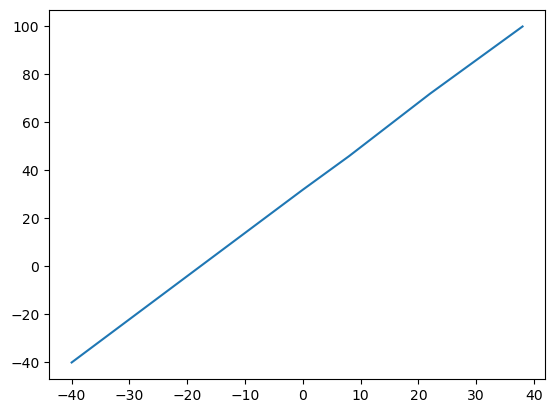

In [9]:
import matplotlib.pyplot as plt
plt.plot(celsius_q, fahrenheit_a)

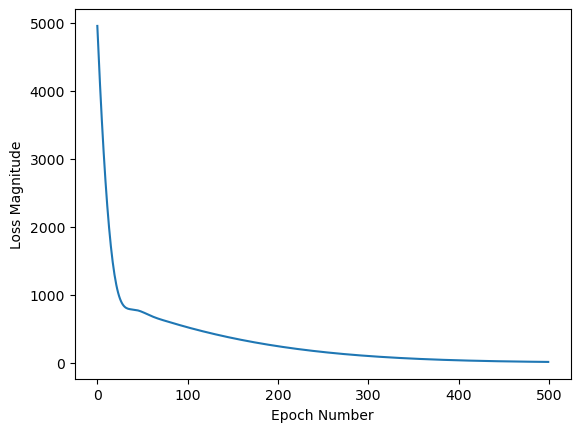

In [10]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [11]:
print(model.predict(np.array([100.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[211.30304]]


In [13]:
print("These are the layer variables: {}".format(model.layers[0].get_weights()))

These are the layer variables: [array([[1.8271713]], dtype=float32), array([28.571985], dtype=float32)]


## 加更多層

In [14]:
input = tf.keras.layers.Input([1]) 
l0 = tf.keras.layers.Dense(units=4)  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([input, l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(c, f, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict(np.array([100.0])))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict(np.array([100.0]))))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[211.74745]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[-1.0806203 , -0.15992121, -0.3948057 ,  0.20193183]],
      dtype=float32), array([-4.0462    ,  2.548002  ,  2.275491  , -0.12930927], dtype=float32)]
These are the l1 variables: [array([[-1.837312  ,  1.5147811 ,  0.6990683 ,  0.6520177 ],
       [ 0.9514756 , -0.5061188 , -0.22944422, -1.0414351 ],
       [ 0.20889273, -1.4443126 , -1.1300988 , -0.79742056],
       [-0.22340465,  0.25618914,  0.47041282, -0.04412582]],
      dtype=float32), array([ 2.6545386 , -4.145314  ,  0.30148435, -3.6830971 ], dtype=float32)]
These are the l2 variables: [array([[ 0.426199  ],
       [-0.9713891 ],
       [ 0.33508992],
       [-0.9615829 ]], dtype=float32), array([3.5021305], dtype=float32)]


## 結論：加更多神經層及更多神經元，結果更準，但公式已無法理解，因此，神經網路被稱為黑箱科學。

## 多次迴歸

In [ ]:
# c=celsius_q
# f=fahrenheit_a
# for _ in range(100):
#     c = np.append(c, celsius_q)
#     f = np.append(f, fahrenheit_a)
# c.shape    

c = np.random.randint(-1000, 1000, 700) / 10
f = c * 1.8 + 32
c = c[:, np.newaxis]
c2 = c ** 2
c3 = c ** 3
c = np.concatenate((c, c2, c3), axis=1)

In [ ]:
c.shape, f.shape

In [ ]:
c[0]

In [15]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=1, input_shape=[3])  
    ]
)

In [77]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])

In [78]:
history = model.fit(c, f, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [79]:
model.layers[0].get_weights()

[array([[ 2.1696134e+00],
        [ 1.4108618e-03],
        [-6.1187777e-05]], dtype=float32),
 array([22.651054], dtype=float32)]

In [80]:
X = np.array([100.0, 100.0, 100.0]).reshape(1, 3)
print(model.predict(X))

[[239.74734]]


In [81]:
X = np.array([100.0, 100.0**2, 100.0**3]).reshape(1, 3)
print(model.predict(X))

[[192.53323]]


In [82]:
c = np.random.randint(-1000, 1000, 700) / 10
f = c * 1.8 + 32
reg = np.polyfit(c, f, deg=3)

reg

array([-1.75446728e-19, -7.57539255e-18,  1.80000000e+00,  3.20000000e+01])